In [ ]:
!nvidia-smi

Thu Dec  4 17:36:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   31C    P0             52W /  400W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
%cd /content/

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gdown

In [ ]:
# dataset

!gdown 1VPzLCuT8hVyyoP0C-2FjRvSlD8B3PgIq

Downloading...
From (original): https://drive.google.com/uc?id=1VPzLCuT8hVyyoP0C-2FjRvSlD8B3PgIq
From (redirected): https://drive.google.com/uc?id=1VPzLCuT8hVyyoP0C-2FjRvSlD8B3PgIq&confirm=t&uuid=708d41a8-604e-4b0e-923a-6ae461d65536
To: /content/seq-01.zip
100% 480M/480M [00:06<00:00, 71.6MB/s]


In [ ]:
# Lulin's room

!gdown 1WWz3elhLEgGUOOSUcuMVJq4-CpYyoENN

Downloading...
From (original): https://drive.google.com/uc?id=1WWz3elhLEgGUOOSUcuMVJq4-CpYyoENN
From (redirected): https://drive.google.com/uc?id=1WWz3elhLEgGUOOSUcuMVJq4-CpYyoENN&confirm=t&uuid=f14b70f4-7211-4b5e-92c3-a0f11d021003
To: /content/raw_1fps.zip
100% 57.0M/57.0M [00:00<00:00, 73.9MB/s]


In [ ]:
# Lulin's room - with more frames

!gdown 1C4NA__1HIlkazihfmcz3BZpxFvjk8nFV

Downloading...
From (original): https://drive.google.com/uc?id=1C4NA__1HIlkazihfmcz3BZpxFvjk8nFV
From (redirected): https://drive.google.com/uc?id=1C4NA__1HIlkazihfmcz3BZpxFvjk8nFV&confirm=t&uuid=10c896ac-5a4b-4bd3-895f-de44d73de366
To: /content/raw_1fps.zip
100% 250M/250M [00:03<00:00, 74.0MB/s]


In [ ]:
path_in_content = "/content/raw_1fps"

if os.path.exists(path_in_content):
    shutil.rmtree(path_in_content)

In [ ]:
# !unzip seq-01.zip

In [ ]:
!unzip raw_1fps.zip -d raw_1fps/

Archive:  raw_1fps.zip
   creating: raw_1fps/raw_1fps/
  inflating: raw_1fps/__MACOSX/._raw_1fps  
  inflating: raw_1fps/raw_1fps/.DS_Store  
  inflating: raw_1fps/__MACOSX/raw_1fps/._.DS_Store  
   creating: raw_1fps/raw_1fps/frames_old/
  inflating: raw_1fps/__MACOSX/raw_1fps/._frames_old  
   creating: raw_1fps/raw_1fps/frames/
  inflating: raw_1fps/__MACOSX/raw_1fps/._frames  
  inflating: raw_1fps/raw_1fps/IMG_8607.mp4  
  inflating: raw_1fps/__MACOSX/raw_1fps/._IMG_8607.mp4  
  inflating: raw_1fps/raw_1fps/frames_old/.DS_Store  
  inflating: raw_1fps/__MACOSX/raw_1fps/frames_old/._.DS_Store  
  inflating: raw_1fps/raw_1fps/frames_old/frame_00006.png  
  inflating: raw_1fps/__MACOSX/raw_1fps/frames_old/._frame_00006.png  
  inflating: raw_1fps/raw_1fps/frames_old/frame_00012.png  
  inflating: raw_1fps/__MACOSX/raw_1fps/frames_old/._frame_00012.png  
  inflating: raw_1fps/raw_1fps/frames_old/frame_00013.png  
  inflating: raw_1fps/__MACOSX/raw_1fps/frames_old/._frame_00013.png  
 

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content

/content


In [ ]:
import os
import shutil

# Define the directories to be deleted
path_in_content = "/content/sfm_for_3dgs_custom_sfm"
path_in_gaussian_splatting = "/content/gaussian-splatting/sfm_for_3dgs_custom_sfm"

# Delete from /content
if os.path.exists(path_in_content):
    shutil.rmtree(path_in_content)
    print(f"✓ Deleted {path_in_content}")
else:
    print(f"✗ {path_in_content} not found, skipping deletion.")

# Delete from /content/gaussian-splatting
if os.path.exists(path_in_gaussian_splatting):
    shutil.rmtree(path_in_gaussian_splatting)
    print(f"✓ Deleted {path_in_gaussian_splatting}")
else:
    print(f"✗ {path_in_gaussian_splatting} not found, skipping deletion.")

✗ /content/sfm_for_3dgs_custom_sfm not found, skipping deletion.
✓ Deleted /content/gaussian-splatting/sfm_for_3dgs_custom_sfm


In [ ]:
# ============================================================================
# GPU-Accelerated SfM for 3D Gaussian Splatting - PASTE THIS INTO A COLAB CELL
# ============================================================================

!cd /content

import os
import shutil
import random
from pathlib import Path
import struct
import time
import cv2
import numpy as np
from scipy.spatial.transform import Rotation
import torch

# =========================== CONFIGURATION ===================================
# DATA_DIR = "./seq-01"
# OUTPUT_DIR = "./sfm_for_3dgs_custom_sfm"
# IMAGE_PATTERN = "frame-*.color.png"
# FRAME_SKIP = 10
# MAX_FRAMES = 10
# USE_GPU = True

DATA_DIR = "./raw_1fps/raw_1fps/frames"
OUTPUT_DIR = "./sfm_for_3dgs_custom_sfm"
IMAGE_PATTERN = "frame_*.png"
FRAME_SKIP = 1
MAX_FRAMES = 25
USE_GPU = True
# =============================================================================

random.seed(42)


class TorchBundleAdjustment:
    def __init__(self, device='cuda'):
        self.device = torch.device(device if torch.cuda.is_available() else 'cpu')
        print(f"  Bundle Adjustment using: {self.device}")

    def rodrigues_batch(self, rvecs):
        batch_size = rvecs.shape[0]
        theta = torch.norm(rvecs, dim=1, keepdim=True).clamp(min=1e-8)
        k = rvecs / theta

        K = torch.zeros(batch_size, 3, 3, device=self.device, dtype=rvecs.dtype)
        K[:, 0, 1], K[:, 0, 2] = -k[:, 2], k[:, 1]
        K[:, 1, 0], K[:, 1, 2] = k[:, 2], -k[:, 0]
        K[:, 2, 0], K[:, 2, 1] = -k[:, 1], k[:, 0]

        eye = torch.eye(3, device=self.device, dtype=rvecs.dtype).unsqueeze(0).expand(batch_size, -1, -1)
        sin_theta = torch.sin(theta).unsqueeze(-1)
        cos_theta = torch.cos(theta).unsqueeze(-1)
        return eye + sin_theta * K + (1 - cos_theta) * torch.bmm(K, K)

    def compute_reprojection_error(self, params, observations, camera_matrices, n_cameras, n_points):
        camera_params = params[:n_cameras * 6].reshape(n_cameras, 6)
        point_params = params[n_cameras * 6:].reshape(n_points, 3)

        R_all = self.rodrigues_batch(camera_params[:, :3])
        tvecs = camera_params[:, 3:6]

        cam_indices = observations[:, 0].long()
        pt_indices = observations[:, 1].long()
        obs_2d = observations[:, 2:4]

        R = R_all[cam_indices]
        t = tvecs[cam_indices]
        K = camera_matrices[cam_indices]
        pts_3d = point_params[pt_indices]

        pts_cam = torch.bmm(R, pts_3d.unsqueeze(-1)).squeeze(-1) + t
        pts_proj = torch.bmm(K, pts_cam.unsqueeze(-1)).squeeze(-1)
        pts_2d = pts_proj[:, :2] / pts_proj[:, 2:3]

        return ((pts_2d - obs_2d) ** 2).sum()

    def optimize(self, camera_params_init, points_3d_init, observations, camera_matrices, max_iterations=100, lr=0.01):
        n_cameras, n_points = camera_params_init.shape[0], points_3d_init.shape[0]

        params = torch.tensor(
            np.concatenate([camera_params_init.flatten(), points_3d_init.flatten()]),
            dtype=torch.float64, device=self.device, requires_grad=True
        )
        observations_t = torch.tensor(np.array(observations, dtype=np.float64), dtype=torch.float64, device=self.device)
        K_t = torch.tensor(camera_matrices, dtype=torch.float64, device=self.device)

        optimizer = torch.optim.Adam([params], lr=lr)
        best_cost, best_params = float('inf'), params.clone()

        for i in range(max_iterations):
            optimizer.zero_grad()
            loss = self.compute_reprojection_error(params, observations_t, K_t, n_cameras, n_points)
            if loss.item() < best_cost:
                best_cost, best_params = loss.item(), params.clone()
            loss.backward()
            optimizer.step()
            if (i + 1) % 20 == 0:
                print(f"    Iter {i+1}/{max_iterations}, Loss: {loss.item():.4f}")

        with torch.no_grad():
            opt = best_params.cpu().numpy()
        return opt[:n_cameras * 6].reshape(n_cameras, 6), opt[n_cameras * 6:].reshape(n_points, 3)


class CustomSfM:
    def __init__(self, images_dir, use_gpu=True):
        self.images_dir = images_dir
        self.use_gpu = use_gpu and torch.cuda.is_available()
        self.images, self.features, self.matches, self.cameras, self.poses = {}, {}, {}, {}, {}
        self.points3D, self.point_colors, self.registered_images = [], [], set()
        self.point_tracks, self.point3D_to_track = [], {}

        if self.use_gpu:
            self.ba_optimizer = TorchBundleAdjustment('cuda')
            print("✓ GPU acceleration enabled")
        else:
            self.ba_optimizer = None
            print("✗ Using CPU")

    def load_images(self, image_files):
        print("Loading images...")
        for i, f in enumerate(image_files):
            img = cv2.imread(str(f))
            if img is not None:
                self.images[f.name] = img
                if i < 3: print(f"  {f.name}: {img.shape[1]}x{img.shape[0]}")
        print(f"  ({len(self.images)} loaded)")

    def detect_features(self):
        print("\nDetecting SIFT features...")
        sift = cv2.SIFT_create(nfeatures=8192)
        for name, img in self.images.items():
            kp, desc = sift.detectAndCompute(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), None)
            self.features[name] = (kp, desc)
            print(f"  {name}: {len(kp)} features")

    def match_features(self):
        print("\nMatching features...")
        bf = cv2.BFMatcher(cv2.NORM_L2)
        names = list(self.images.keys())
        for i in range(len(names)):
            for j in range(i + 1, len(names)):
                _, d1 = self.features[names[i]]
                _, d2 = self.features[names[j]]
                if d1 is None or d2 is None: continue
                matches = bf.knnMatch(d1, d2, k=2)
                good = []
                for match in matches:
                    if len(match) == 2:
                        m, n = match
                        if m.distance < 0.7 * n.distance:
                            good.append(m)
                if len(good) >= 50:
                    self.matches[(names[i], names[j])] = good
                    print(f"  {names[i]} <-> {names[j]}: {len(good)} matches")
        print(f"  ({len(self.matches)} pairs total)")

    def estimate_K(self, name):
        h, w = self.images[name].shape[:2]
        f = max(w, h) * 0.8
        return np.array([[f, 0, w/2], [0, f, h/2], [0, 0, 1]], dtype=np.float64)

    def bootstrap_reconstruction(self):
        print("\nBootstrapping...")
        for (n1, n2), matches in sorted(self.matches.items(), key=lambda x: -len(x[1])):
            kp1, _ = self.features[n1]
            kp2, _ = self.features[n2]
            pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
            pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])
            K1, K2 = self.estimate_K(n1), self.estimate_K(n2)

            E, mask_E = cv2.findEssentialMat(pts1, pts2, K1, method=cv2.RANSAC, prob=0.999, threshold=1.0)
            if E is None: continue
            _, R, t, mask = cv2.recoverPose(E, pts1, pts2, K1, mask=mask_E)
            inliers = mask.ravel() == 1
            if inliers.sum() < 8: continue

            print(f"  Using: {n1} <-> {n2}")
            self.cameras[n1], self.cameras[n2] = K1, K2
            self.poses[n1] = (np.eye(3), np.zeros(3))
            self.poses[n2] = (R.astype(np.float64), t.flatten().astype(np.float64))
            self.registered_images.update([n1, n2])

            P1 = K1 @ np.hstack([np.eye(3), np.zeros((3, 1))])
            P2 = K2 @ np.hstack([R, t])
            pts1_in, pts2_in = pts1[inliers], pts2[inliers]
            matches_in = [m for m, k in zip(matches, inliers) if k]

            pts_4d = cv2.triangulatePoints(P1, P2, pts1_in.T, pts2_in.T)
            pts_3d = (pts_4d[:3] / pts_4d[3]).T
            valid = (pts_3d[:, 2] > 0) & (pts_3d[:, 2] < 100)

            img1 = self.images[n1]
            for pt3d, pt1, pt2, m in zip(pts_3d[valid], pts1_in[valid], pts2_in[valid], [m for m, v in zip(matches_in, valid) if v]):
                self.points3D.append(pt3d.tolist())
                x, y = int(pt1[0]), int(pt1[1])
                self.point_colors.append(img1[y, x][[2,1,0]].tolist() if 0 <= x < img1.shape[1] and 0 <= y < img1.shape[0] else [128,128,128])
                self.point_tracks.append({n1: (m.queryIdx, pt1), n2: (m.trainIdx, pt2)})
                self.point3D_to_track[len(self.points3D) - 1] = len(self.point_tracks) - 1
            print(f"  Triangulated {valid.sum()} points")
            return
        raise RuntimeError("No valid initial pair!")

    def add_image(self, name):
        kp, _ = self.features[name]
        K = self.estimate_K(name)
        self.cameras[name] = K

        pts_2d, pts_3d = [], []
        for reg in self.registered_images:
            key = (reg, name) if (reg, name) in self.matches else (name, reg) if (name, reg) in self.matches else None
            if not key: continue
            flip = key[0] == name
            for m in self.matches[key]:
                idx_new, idx_reg = (m.queryIdx, m.trainIdx) if flip else (m.trainIdx, m.queryIdx)
                for pi, ti in self.point3D_to_track.items():
                    if reg in self.point_tracks[ti] and self.point_tracks[ti][reg][0] == idx_reg:
                        pts_2d.append(kp[idx_new].pt)
                        pts_3d.append(self.points3D[pi])
                        break

        if len(pts_2d) < 8: return False
        ok, rvec, tvec, inliers = cv2.solvePnPRansac(np.array(pts_3d), np.array(pts_2d), K, None, reprojectionError=8.0, confidence=0.99)
        if not ok or inliers is None or len(inliers) < 8: return False

        R, _ = cv2.Rodrigues(rvec)
        self.poses[name] = (R.astype(np.float64), tvec.flatten().astype(np.float64))
        self.registered_images.add(name)
        self._triangulate_new(name)
        return True

    def _triangulate_new(self, new_name):
        kp_new, _ = self.features[new_name]
        K_new, (R_new, t_new) = self.cameras[new_name], self.poses[new_name]
        P_new = K_new @ np.hstack([R_new, t_new.reshape(3, 1)])
        count = 0

        for reg in self.registered_images:
            if reg == new_name: continue
            key = (reg, new_name) if (reg, new_name) in self.matches else (new_name, reg) if (new_name, reg) in self.matches else None
            if not key: continue
            flip = key[0] == new_name
            kp_reg, _ = self.features[reg]
            R_reg, t_reg = self.poses[reg]
            P_reg = self.cameras[reg] @ np.hstack([R_reg, t_reg.reshape(3, 1)])

            for m in self.matches[key]:
                idx_new, idx_reg = (m.queryIdx, m.trainIdx) if flip else (m.trainIdx, m.queryIdx)
                if any((reg in t and t[reg][0] == idx_reg) or (new_name in t and t[new_name][0] == idx_new) for t in self.point_tracks):
                    continue

                pt_4d = cv2.triangulatePoints(P_reg, P_new, np.array([kp_reg[idx_reg].pt]).T, np.array([kp_new[idx_new].pt]).T)
                pt_3d = (pt_4d[:3] / pt_4d[3]).flatten()
                if pt_3d[2] <= 0 or pt_3d[2] >= 100: continue

                self.points3D.append(pt_3d.tolist())
                img = self.images[new_name]
                x, y = int(kp_new[idx_new].pt[0]), int(kp_new[idx_new].pt[1])
                self.point_colors.append(img[y, x][[2,1,0]].tolist() if 0 <= x < img.shape[1] and 0 <= y < img.shape[0] else [128,128,128])
                self.point_tracks.append({reg: (idx_reg, np.array(kp_reg[idx_reg].pt)), new_name: (idx_new, np.array(kp_new[idx_new].pt))})
                self.point3D_to_track[len(self.points3D) - 1] = len(self.point_tracks) - 1
                count += 1
        if count: print(f"  +{count} pts")

    def bundle_adjustment(self, max_iter=100):
        print("\nBundle Adjustment...")
        if len(self.points3D) < 10: return

        names = sorted(self.registered_images)
        name_to_idx = {n: i for i, n in enumerate(names)}

        cam_params = np.array([np.concatenate([cv2.Rodrigues(self.poses[n][0])[0].flatten(), self.poses[n][1]]) for n in names])
        pts_3d = np.array(self.points3D)
        obs = [[name_to_idx[n], pi, pt[0], pt[1]] for pi, ti in self.point3D_to_track.items() for n, (_, pt) in self.point_tracks[ti].items() if n in name_to_idx]
        Ks = np.array([self.cameras[n] for n in names])

        print(f"  {len(names)} cams, {len(pts_3d)} pts, {len(obs)} obs")

        if self.use_gpu and self.ba_optimizer:
            opt_cams, opt_pts = self.ba_optimizer.optimize(cam_params, pts_3d, obs, Ks, max_iter, lr=0.001)
        else:
            from scipy.optimize import least_squares
            def res(p):
                c, pt = p[:len(names)*6].reshape(-1, 6), p[len(names)*6:].reshape(-1, 3)
                r = []
                for ci, pi, ox, oy in obs:
                    proj, _ = cv2.projectPoints(pt[int(pi)].reshape(1,3), c[int(ci),:3], c[int(ci),3:], Ks[int(ci)], None)
                    r.extend([ox - proj[0,0,0], oy - proj[0,0,1]])
                return np.array(r)
            result = least_squares(res, np.concatenate([cam_params.flatten(), pts_3d.flatten()]), method='lm', max_nfev=max_iter)
            opt_cams, opt_pts = result.x[:len(names)*6].reshape(-1, 6), result.x[len(names)*6:].reshape(-1, 3)

        for i, n in enumerate(names):
            R, _ = cv2.Rodrigues(opt_cams[i, :3])
            self.poses[n] = (R, opt_cams[i, 3:])
        for i in range(len(self.points3D)):
            self.points3D[i] = opt_pts[i].tolist()

    def run(self):
        print("\n" + "="*70 + "\nRUNNING SfM\n" + "="*70)
        self.bootstrap_reconstruction()
        unreg = set(self.images.keys()) - self.registered_images
        cnt = 0
        for n in sorted(unreg):
            if self.add_image(n):
                cnt += 1
                print(f"Added {n} ({len(self.points3D)} pts)")
                if cnt % 5 == 0: self.bundle_adjustment(50)
        if len(self.registered_images) >= 2:
            self.bundle_adjustment(100)
        print(f"\n✓ Done: {len(self.registered_images)}/{len(self.images)} imgs, {len(self.points3D)} pts")

    def export(self, out_dir):
        print("\nExporting COLMAP format...")
        sparse = os.path.join(out_dir, "sparse", "0")
        os.makedirs(sparse, exist_ok=True)

        # cameras.txt
        with open(os.path.join(sparse, "cameras.txt"), "w") as f:
            f.write("# CAMERA_ID, MODEL, WIDTH, HEIGHT, PARAMS[]\n")
            for i, (n, K) in enumerate(self.cameras.items(), 1):
                h, w = self.images[n].shape[:2]
                f.write(f"{i} PINHOLE {w} {h} {K[0,0]} {K[1,1]} {K[0,2]} {K[1,2]}\n")

        # images.txt
        with open(os.path.join(sparse, "images.txt"), "w") as f:
            f.write("# IMAGE_ID, QW, QX, QY, QZ, TX, TY, TZ, CAMERA_ID, NAME\n")
            for i, n in enumerate(sorted(self.registered_images), 1):
                R, t = self.poses[n]
                q = Rotation.from_matrix(R).as_quat()
                f.write(f"{i} {q[3]} {q[0]} {q[1]} {q[2]} {t[0]} {t[1]} {t[2]} 1 {n}\n\n")

        # points3D.txt
        with open(os.path.join(sparse, "points3D.txt"), "w") as f:
            for i, (p, c) in enumerate(zip(self.points3D, self.point_colors), 1):
                f.write(f"{i} {p[0]} {p[1]} {p[2]} {c[0]} {c[1]} {c[2]} 1.0\n")

        # Binary files
        with open(os.path.join(sparse, "cameras.bin"), 'wb') as f:
            f.write(struct.pack('Q', len(self.cameras)))
            for i, (n, K) in enumerate(self.cameras.items(), 1):
                h, w = self.images[n].shape[:2]
                f.write(struct.pack('i', i) + struct.pack('i', 1) + struct.pack('QQ', w, h))
                f.write(struct.pack('dddd', K[0,0], K[1,1], K[0,2], K[1,2]))

        with open(os.path.join(sparse, "images.bin"), 'wb') as f:
            f.write(struct.pack('Q', len(self.registered_images)))
            for i, n in enumerate(sorted(self.registered_images), 1):
                R, t = self.poses[n]
                q = Rotation.from_matrix(R).as_quat()
                f.write(struct.pack('i', i) + struct.pack('dddd', q[3], q[0], q[1], q[2]))
                f.write(struct.pack('ddd', *t) + struct.pack('i', 1))
                f.write(n.encode() + b'\x00' + struct.pack('Q', 0))

        with open(os.path.join(sparse, "points3D.bin"), 'wb') as f:
            f.write(struct.pack('Q', len(self.points3D)))
            for i, (p, c) in enumerate(zip(self.points3D, self.point_colors), 1):
                f.write(struct.pack('Q', i) + struct.pack('ddd', *p) + struct.pack('BBB', *c))
                f.write(struct.pack('d', 1.0) + struct.pack('Q', 0))

        # PLY
        with open(os.path.join(out_dir, "sparse_points.ply"), "w") as f:
            f.write(f"ply\nformat ascii 1.0\nelement vertex {len(self.points3D)}\n")
            f.write("property float x\nproperty float y\nproperty float z\n")
            f.write("property uchar red\nproperty uchar green\nproperty uchar blue\nend_header\n")
            for p, c in zip(self.points3D, self.point_colors):
                f.write(f"{p[0]} {p[1]} {p[2]} {c[0]} {c[1]} {c[2]}\n")

        print(f"  ✓ Exported to {sparse}")


# =============================================================================
# RUN THE PIPELINE
# =============================================================================

print("="*70)
print("GPU-ACCELERATED SfM FOR 3D GAUSSIAN SPLATTING")
print("="*70)

# Prepare output
shutil.rmtree(OUTPUT_DIR, ignore_errors=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)
IMG_FOLDER = os.path.join(OUTPUT_DIR, "images")
os.makedirs(IMG_FOLDER, exist_ok=True)

# Select images
src_imgs = sorted(Path(DATA_DIR).glob(IMAGE_PATTERN))
filtered = src_imgs[::max(1, FRAME_SKIP)]
selected = sorted(random.sample(filtered, min(MAX_FRAMES, len(filtered))))
print(f"Selected {len(selected)}/{len(src_imgs)} images")

for i, src in enumerate(selected):
    shutil.copy(src, os.path.join(IMG_FOLDER, f"frame_{i:04d}{src.suffix}"))

# Run SfM
sfm = CustomSfM(IMG_FOLDER, use_gpu=USE_GPU)
sfm.load_images(sorted(Path(IMG_FOLDER).glob("*")))
sfm.detect_features()
sfm.match_features()
sfm.run()
sfm.export(OUTPUT_DIR)

print("\n" + "="*70)
print("READY FOR 3DGS TRAINING!")
print(f"python train.py -s {OUTPUT_DIR} --iterations 30000")
print("="*70)


GPU-ACCELERATED SfM FOR 3D GAUSSIAN SPLATTING
Selected 25/98 images
  Bundle Adjustment using: cuda
✓ GPU acceleration enabled
Loading images...
  frame_0000.png: 1920x1080
  frame_0001.png: 1920x1080
  frame_0002.png: 1920x1080
  (25 loaded)

Detecting SIFT features...
  frame_0000.png: 1263 features
  frame_0001.png: 1270 features
  frame_0002.png: 1544 features
  frame_0003.png: 2092 features
  frame_0004.png: 2428 features
  frame_0005.png: 3004 features
  frame_0006.png: 3773 features
  frame_0007.png: 3155 features
  frame_0008.png: 3413 features
  frame_0009.png: 3247 features
  frame_0010.png: 3761 features
  frame_0011.png: 3825 features
  frame_0012.png: 548 features
  frame_0013.png: 1247 features
  frame_0014.png: 963 features
  frame_0015.png: 1452 features
  frame_0016.png: 1236 features
  frame_0017.png: 2400 features
  frame_0018.png: 2916 features
  frame_0019.png: 3530 features
  frame_0020.png: 2023 features
  frame_0021.png: 1579 features
  frame_0022.png: 2010 feat

In [ ]:
import os
import shutil

source_dir = "./sfm_for_3dgs_custom_sfm"
dest_dir = "/content/drive/MyDrive/Shared/sfm_for_3dgs_custom_sfmV3"

# Ensure the destination directory exists
os.makedirs(os.path.dirname(dest_dir), exist_ok=True)

# Copy the directory
if os.path.exists(source_dir):
    shutil.copytree(source_dir, dest_dir, dirs_exist_ok=True)
    print(f"Successfully copied '{source_dir}' to '{dest_dir}'")
else:
    print(f"Error: Source directory '{source_dir}' not found.")


Successfully copied './sfm_for_3dgs_custom_sfm' to '/content/drive/MyDrive/Shared/sfm_for_3dgs_custom_sfmV3'


In [ ]:
# Run only if not existing

%cd /content/
!git clone https://github.com/graphdeco-inria/gaussian-splatting.git --recursive
%cd gaussian-splatting

/content
fatal: destination path 'gaussian-splatting' already exists and is not an empty directory.
/content/gaussian-splatting


In [ ]:
!pip install gdown opencv-python scipy

In [ ]:
!pip install plyfile tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
%cd submodules/diff-gaussian-rasterization
!pip install .

/content/gaussian-splatting/submodules/diff-gaussian-rasterization
Processing /content/gaussian-splatting/submodules/diff-gaussian-rasterization
  Preparing metadata (setup.py) ... done
  Created wheel for diff_gaussian_rasterization: filename=diff_gaussian_rasterization-0.0.0-cp312-cp312-linux_x86_64.whl size=3750496 sha256=3fa77213010f805f6731ae567bc0373777df16689742a9042f2eeddf9316f559
  Stored in directory: /root/.cache/pip/wheels/01/e0/e8/f40a1cd6a1d5760cbd3036081bdad5b36c41fc11c786d4a404
Successfully built diff_gaussian_rasterization


In [ ]:
%cd ../simple-knn
!pip install .

/content/gaussian-splatting/submodules/simple-knn
Processing /content/gaussian-splatting/submodules/simple-knn
  Preparing metadata (setup.py) ... done
  Created wheel for simple_knn: filename=simple_knn-0.0.0-cp312-cp312-linux_x86_64.whl size=3486169 sha256=2f43189b0641916082d3a3af03a4ee97febab40e98cc2cb48f101fae038fbc6a
  Stored in directory: /root/.cache/pip/wheels/0a/f2/1b/255828ebad94ea248378281b7926639d83ce4f394f0052800d
Successfully built simple_knn


In [ ]:
%cd ../..

/content/gaussian-splatting


In [ ]:
import torch
print('PyTorch version:', torch.__version__)
print('CUDA available:', torch.cuda.is_available())
print('CUDA version:', torch.version.cuda)

PyTorch version: 2.9.0+cu126
CUDA available: True
CUDA version: 12.6


In [ ]:
%cd /content/gaussian-splatting

/content/gaussian-splatting


In [ ]:
%pwd
# should be /content/gaussian-splatting

'/content/gaussian-splatting'

In [ ]:
OUTPUT_SFM_DIR = "/content/sfm_for_3dgs_custom_sfm"
TARGET_DIR = "./"

import os

if os.path.exists(OUTPUT_SFM_DIR):
    !cp -r {OUTPUT_SFM_DIR} {TARGET_DIR}
    print(f"✓ Copied {OUTPUT_SFM_DIR} to {TARGET_DIR}")
else:
    print(f"✗ Error: Source directory not found: {OUTPUT_SFM_DIR}")

# Verify content in the current directory
!ls -la {TARGET_DIR}sfm_for_3dgs_custom_sfm/

✓ Copied /content/sfm_for_3dgs_custom_sfm to ./
total 912
drwxr-xr-x  4 root root   4096 Dec  4 18:36 .
drwxr-xr-x 13 root root   4096 Dec  4 18:36 ..
drwxr-xr-x  2 root root   4096 Dec  4 18:36 images
drwxr-xr-x  3 root root   4096 Dec  4 18:36 sparse
-rw-r--r--  1 root root 915740 Dec  4 18:36 sparse_points.ply


In [ ]:
%cd /content/gaussian-splatting

/content/gaussian-splatting


In [ ]:
!ls -la ./sfm_for_3dgs_custom_sfm/
!ls -la ./sfm_for_3dgs_custom_sfm/sparse/
!ls -la ./sfm_for_3dgs_custom_sfm/sparse/0/

total 20
drwxr-xr-x  4 root root 4096 Dec  4 18:24 .
drwxr-xr-x 12 root root 4096 Dec  4 18:24 ..
drwxr-xr-x  2 root root 4096 Dec  4 18:24 images
drwxr-xr-x  3 root root 4096 Dec  4 18:24 sparse
-rw-r--r--  1 root root  704 Dec  4 18:24 sparse_points.ply
total 12
drwxr-xr-x 3 root root 4096 Dec  4 18:24 .
drwxr-xr-x 4 root root 4096 Dec  4 18:24 ..
drwxr-xr-x 2 root root 4096 Dec  4 18:24 0
total 40
drwxr-xr-x 2 root root 4096 Dec  4 18:24 .
drwxr-xr-x 3 root root 4096 Dec  4 18:24 ..
-rw-r--r-- 1 root root 5048 Dec  4 18:24 cameras.bin
-rw-r--r-- 1 root root 4265 Dec  4 18:24 cameras.txt
-rw-r--r-- 1 root root  182 Dec  4 18:24 images.bin
-rw-r--r-- 1 root root  268 Dec  4 18:24 images.txt
-rw-r--r-- 1 root root  416 Dec  4 18:24 points3D.bin
-rw-r--r-- 1 root root  592 Dec  4 18:24 points3D.txt


In [ ]:
# %cd /content/

In [ ]:
# !ls -la ./sfm_for_3dgs_custom_sfm/
# !ls -la ./sfm_for_3dgs_custom_sfm/sparse/
# !ls -la ./sfm_for_3dgs_custom_sfm/sparse/0/

In [ ]:
# # Check the content of the COLMAP files
# !head -20 ./sfm_for_3dgs_custom_sfm/sparse/0/cameras.txt
# !echo "---"
# !head -20 ./sfm_for_3dgs_custom_sfm/sparse/0/images.txt

In [ ]:
%cd /content/gaussian-splatting

/content/gaussian-splatting


In [ ]:
!python train.py -s ./sfm_for_3dgs_custom_sfm --iterations 30000 --eval

2025-12-04 18:36:44.264512: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-04 18:36:44.282325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764873404.303448   37700 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764873404.309800   37700 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764873404.326278   37700 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:
# Find all output directories
!ls -la ./output/

# List all trained models
!find ./output -name "cfg_args" -type f

total 16
drwxr-xr-x  4 root root 4096 Dec  4 18:36 .
drwxr-xr-x 13 root root 4096 Dec  4 18:36 ..
drwxr-xr-x  3 root root 4096 Dec  4 18:43 4cc0f1be-c
drwxr-xr-x  2 root root 4096 Dec  4 18:24 e81fefaf-a
./output/4cc0f1be-c/cfg_args
./output/e81fefaf-a/cfg_args


Rendering model: 4cc0f1be-c
Looking for config file in ./output/4cc0f1be-c/cfg_args
Config file found: ./output/4cc0f1be-c/cfg_args
Rendering ./output/4cc0f1be-c
Loading trained model at iteration 30000 [04/12 19:04:15]
------------LLFF HOLD------------- [04/12 19:04:15]
Reading camera 21/21 [04/12 19:04:15]
Loading Training Cameras [04/12 19:04:15]
[ INFO ] Encountered quite large input images (>1.6K pixels width), rescaling to 1.6K.
 If this is not desired, please explicitly specify '--resolution/-r' as 1 [04/12 19:04:15]
Loading Test Cameras [04/12 19:04:17]
Rendering progress: 100% 18/18 [00:17<00:00,  1.02it/s]
Rendering progress: 100% 3/3 [00:03<00:00,  1.03s/it]

✓ Found 3 rendered images
✓ Found 3 ground truth images


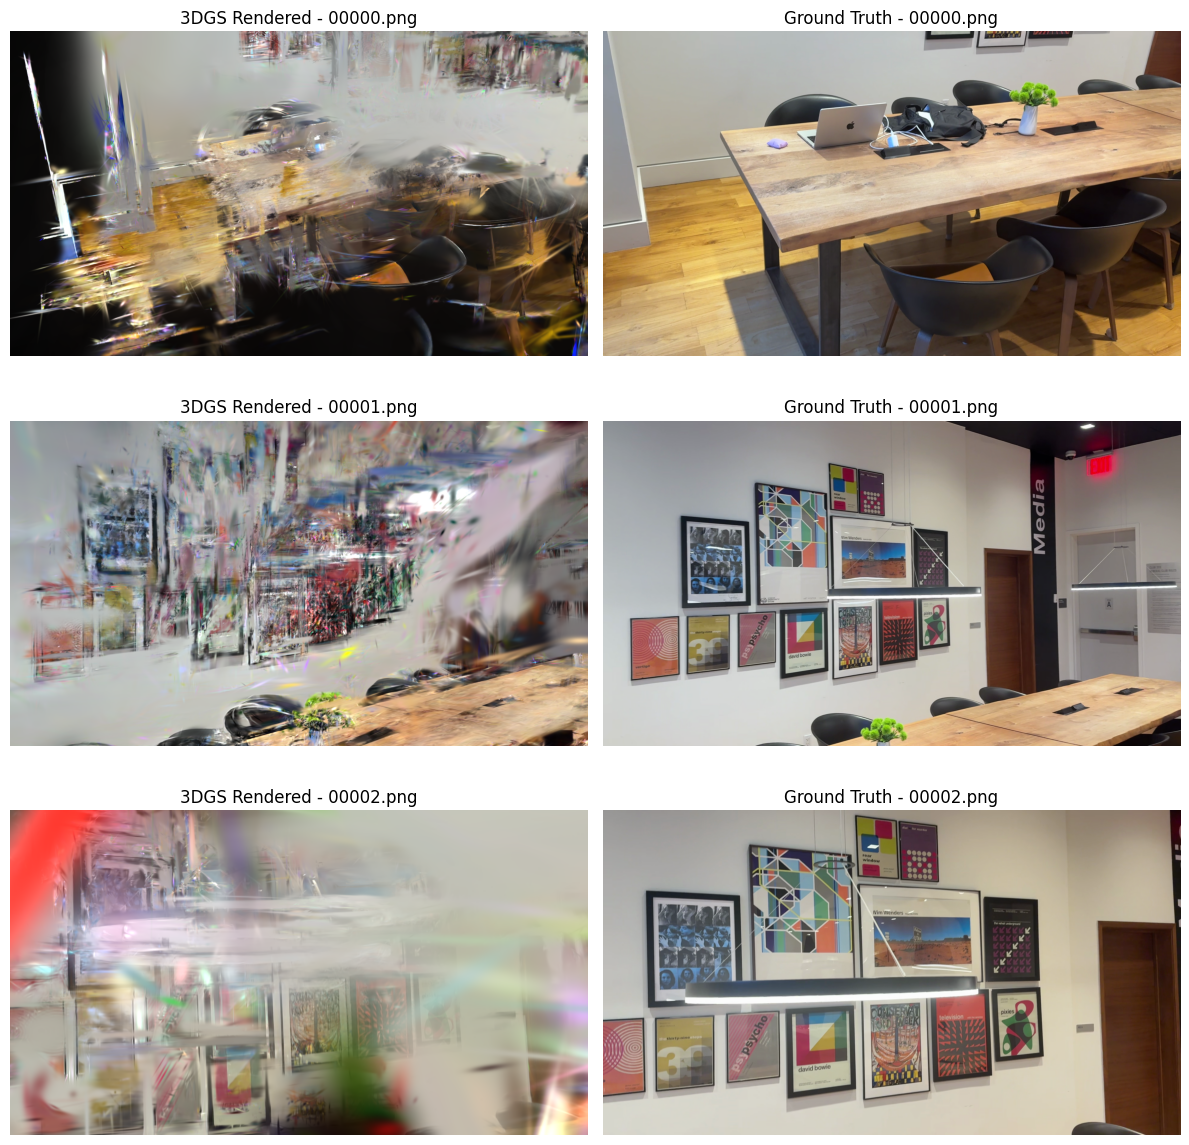


Left column: 3DGS Reconstruction
Right column: Original Ground Truth


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

# Use the most recent model
OUTPUT_DIR = "4cc0f1be-c"

print(f"Rendering model: {OUTPUT_DIR}")
!python render.py -m ./output/{OUTPUT_DIR}

# Now visualize the results
render_dir = f"./output/{OUTPUT_DIR}/test/ours_30000/renders/"
gt_dir = f"./output/{OUTPUT_DIR}/test/ours_30000/gt/"

if os.path.exists(render_dir):
    rendered_images = sorted(glob.glob(os.path.join(render_dir, "*.png")))
    gt_images = sorted(glob.glob(os.path.join(gt_dir, "*.png")))

    print(f"\n Found {len(rendered_images)} rendered images")
    print(f"Found {len(gt_images)} ground truth images")

    if len(rendered_images) > 0:
        # Display comparison
        num_to_show = min(6, len(rendered_images))
        fig, axes = plt.subplots(num_to_show, 2, figsize=(12, 4*num_to_show))

        if num_to_show == 1:
            axes = axes.reshape(1, -1)

        for i in range(num_to_show):
            rendered = Image.open(rendered_images[i])
            gt = Image.open(gt_images[i])

            axes[i, 0].imshow(rendered)
            axes[i, 0].set_title(f"3DGS Rendered - {os.path.basename(rendered_images[i])}")
            axes[i, 0].axis('off')

            axes[i, 1].imshow(gt)
            axes[i, 1].set_title(f"Ground Truth - {os.path.basename(gt_images[i])}")
            axes[i, 1].axis('off')

        plt.tight_layout()
        plt.show()

        print("\nLeft column: 3DGS Reconstruction")
        print("Right column: Original Ground Truth")
    else:
        print("No rendered images found!")
else:
    print(f"Render directory not found: {render_dir}")

Found 3 rendered images
✓ Created reconstruction.gif with 3 frames


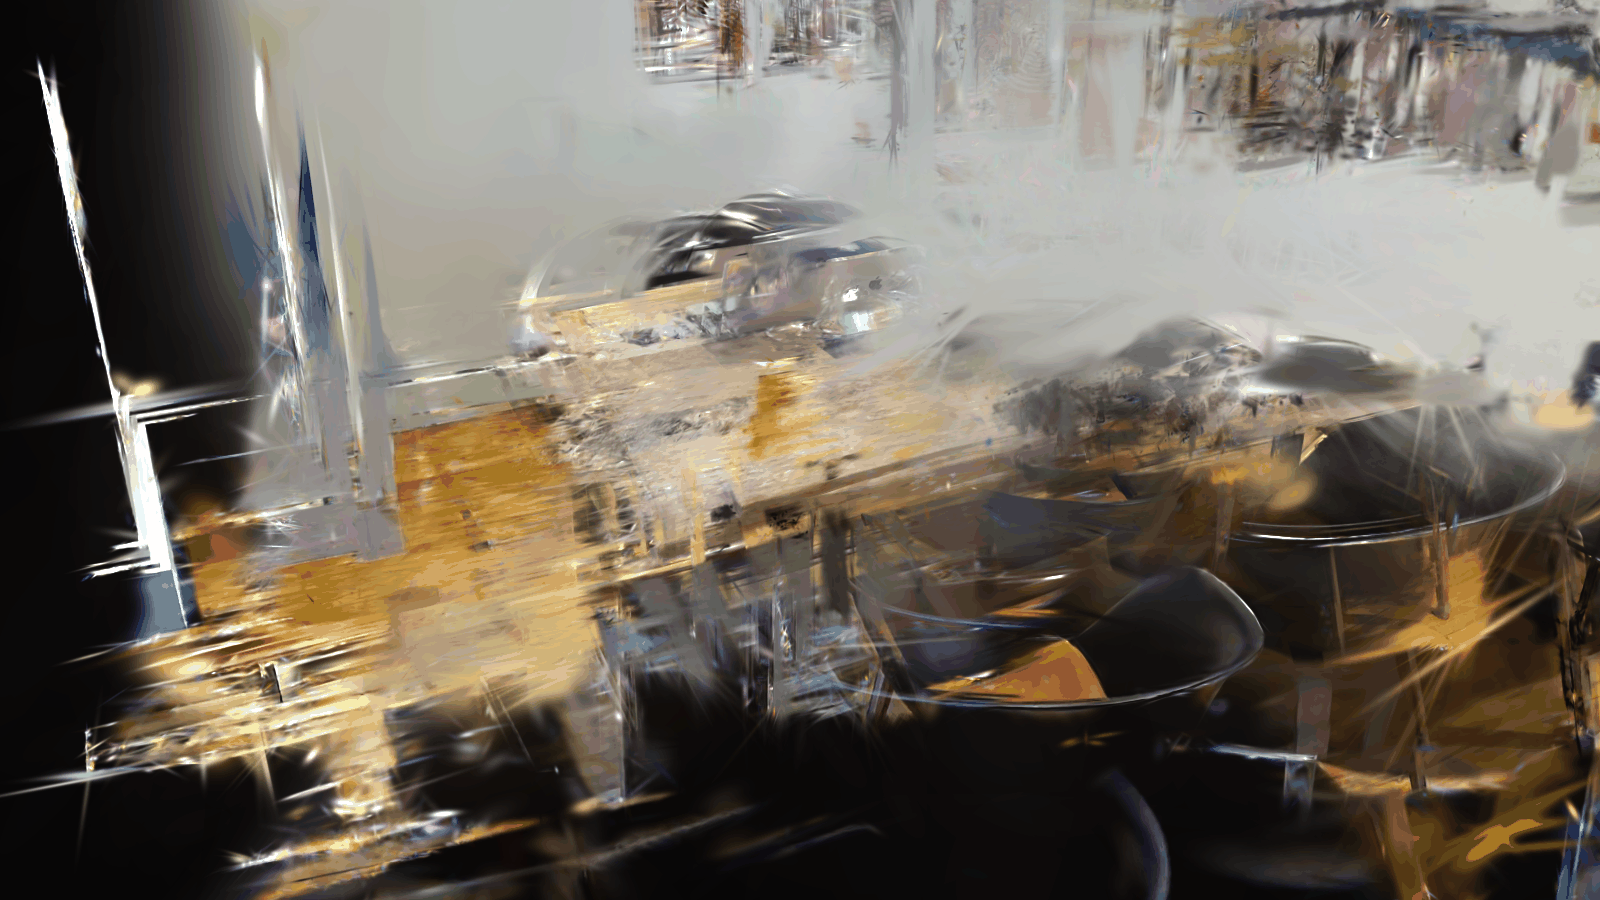

In [ ]:
from PIL import Image
import glob

OUTPUT_DIR = "4cc0f1be-c"

# Get all rendered images
rendered_images = sorted(glob.glob(f"./output/{OUTPUT_DIR}/test/ours_30000/renders/*.png"))

print(f"Found {len(rendered_images)} rendered images")

if len(rendered_images) > 0:
    # Create GIF
    images = [Image.open(img) for img in rendered_images]
    images[0].save(
        'reconstruction.gif',
        save_all=True,
        append_images=images[1:],
        duration=200,  # milliseconds per frame
        loop=0
    )

    print(f"✓ Created reconstruction.gif with {len(images)} frames")

    # Display in Colab
    from IPython.display import Image as IPImage
    display(IPImage('reconstruction.gif'))
else:
    print("No rendered images found!")
    print("run: !python render.py -m ./output/a502b936-3")

In [ ]:
from google.colab import files

# Download the trained gaussian splat model
files.download('./output/4cc0f1be-c/point_cloud/iteration_30000/point_cloud.ply')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# First, let's find where the output actually is
!pwd
!ls -la

# Find the output directory
!find . -name "18648fe7-7" -type d 2>/dev/null

/content/gaussian-splatting/splat
total 166528
drwxr-xr-x  3 root root      4096 Nov 20 07:51 .
drwxr-xr-x 16 root root      4096 Nov 20 07:51 ..
-rw-r--r--  1 root root      2460 Nov 20 07:51 convert.py
drwxr-xr-x  8 root root      4096 Nov 20 07:51 .git
-rw-r--r--  1 root root        11 Nov 20 07:51 .gitignore
-rw-r--r--  1 root root      5723 Nov 20 07:51 index.html
-rw-r--r--  1 root root      1067 Nov 20 07:51 LICENSE
-rw-r--r--  1 root root     51459 Nov 20 07:51 main.js
-rw-r--r--  1 root root 170425643 Nov 20 07:51 point_cloud.ply
-rw-r--r--  1 root root     11126 Nov 20 07:51 README.md


In [ ]:
!python render.py -m output/4cc0f1be-c -s sfm_for_3dgs_custom_sfm

Looking for config file in output/4cc0f1be-c/cfg_args
Config file found: output/4cc0f1be-c/cfg_args
Rendering output/4cc0f1be-c
Loading trained model at iteration 30000 [04/12 19:12:34]
------------LLFF HOLD------------- [04/12 19:12:34]
Reading camera 21/21 [04/12 19:12:34]
Loading Training Cameras [04/12 19:12:34]
[ INFO ] Encountered quite large input images (>1.6K pixels width), rescaling to 1.6K.
 If this is not desired, please explicitly specify '--resolution/-r' as 1 [04/12 19:12:34]
Loading Test Cameras [04/12 19:12:36]
Rendering progress: 100% 18/18 [00:17<00:00,  1.02it/s]
Rendering progress: 100% 3/3 [00:03<00:00,  1.04s/it]


In [ ]:
!pip install lpips scikit-image opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.6 MB/s eta 0:00:00


In [ ]:
import torch
import lpips
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np
from pathlib import Path

# Paths
gt_dir = Path("sfm_for_3dgs_custom_sfm/images")
render_dir = Path("output/4cc0f1be-c/train/ours_30000/renders")

# Load LPIPS model
loss_fn = lpips.LPIPS(net='alex')

def to_tensor(img):
    t = torch.from_numpy(img).permute(2, 0, 1).unsqueeze(0).float()
    return (t / 255.0) * 2 - 1

ssim_scores = []
lpips_scores = []

for gt_path in sorted(gt_dir.glob("*.png")):
    render_path = render_dir / gt_path.name
    if not render_path.exists():
        continue

    gt = cv2.cvtColor(cv2.imread(str(gt_path)), cv2.COLOR_BGR2RGB)
    render = cv2.cvtColor(cv2.imread(str(render_path)), cv2.COLOR_BGR2RGB)

    # Resize if needed
    if gt.shape != render.shape:
        render = cv2.resize(render, (gt.shape[1], gt.shape[0]))

    # SSIM
    ssim_scores.append(ssim(gt, render, channel_axis=2))

    # LPIPS
    lpips_scores.append(loss_fn(to_tensor(gt), to_tensor(render)).item())

print(f"SSIM:  {np.mean(ssim_scores):.4f}")
print(f"LPIPS: {np.mean(lpips_scores):.4f}")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 209MB/s]

Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/alex.pth
SSIM:  nan
LPIPS: nan



/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from pathlib import Path

gt_dir = Path("sfm_for_3dgs_custom_sfm/images")
render_dir = Path("output/4cc0f1be-c/train/ours_30000/renders")  # Update this

print("Ground truth images:")
gt_files = sorted(gt_dir.glob("*.png"))
print(f"  Found {len(gt_files)} files")
for f in gt_files[:3]:
    print(f"  {f.name}")

print("\nRendered images:")
render_files = sorted(render_dir.glob("*.png"))
print(f"  Found {len(render_files)} files")
for f in render_files[:3]:
    print(f"  {f.name}")

Ground truth images:
  Found 25 files
  frame_0000.png
  frame_0001.png
  frame_0002.png

Rendered images:
  Found 18 files
  00000.png
  00001.png
  00002.png


In [ ]:
import torch
import lpips
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np
from pathlib import Path

gt_dir = Path("sfm_for_3dgs_custom_sfm/images")
render_dir = Path("output/4cc0f1be-c/train/ours_30000/renders")  # Update this

loss_fn = lpips.LPIPS(net='alex')

def to_tensor(img):
    t = torch.from_numpy(img).permute(2, 0, 1).unsqueeze(0).float()
    return (t / 255.0) * 2 - 1

ssim_scores = []
lpips_scores = []

gt_files = sorted(gt_dir.glob("*.png"))
render_files = sorted(render_dir.glob("*.png"))

# Match by index since filenames differ
for i, render_path in enumerate(render_files):
    if i >= len(gt_files):
        break

    gt_path = gt_files[i]

    gt = cv2.cvtColor(cv2.imread(str(gt_path)), cv2.COLOR_BGR2RGB)
    render = cv2.cvtColor(cv2.imread(str(render_path)), cv2.COLOR_BGR2RGB)

    if gt.shape != render.shape:
        render = cv2.resize(render, (gt.shape[1], gt.shape[0]))

    ssim_scores.append(ssim(gt, render, channel_axis=2))
    lpips_scores.append(loss_fn(to_tensor(gt), to_tensor(render)).item())

print(f"Compared {len(ssim_scores)} image pairs")
print(f"SSIM:  {np.mean(ssim_scores):.4f}")
print(f"LPIPS: {np.mean(lpips_scores):.4f}")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/alex.pth
Compared 18 image pairs
SSIM:  0.5124
LPIPS: 0.7407
